# Probabilty & Random Process 
## Final Exam:BM22BTECH11002

In [8]:
import pandas as pd
import numpy as np

In [9]:
def airport_rating_cleaned(file_path):
    data = pd.read_csv(file_path)

    relevant_columns = [
        'airport_name',
        'content',
        'overall_rating',
        'queuing_rating',
        'terminal_cleanliness_rating',
        'terminal_seating_rating',
        'food_beverages_rating',
        'airport_shopping_rating',
        'wifi_connectivity_rating',
        'airport_staff_rating',
        'recommended'
    ]

    data_selected = data[relevant_columns]

    data_cleaned_ratings = data_selected.groupby('airport_name').transform(lambda x: x.fillna(x.mean()) if x.name != 'content' else x)

    data_cleaned_ratings['airport_name'] = data['airport_name']
    data_cleaned_ratings['content'] = data['content']
    data_cleaned_ratings['recommended'] = data['recommended']

    return data_cleaned_ratings


In [10]:
airport_file="/content/airport.csv"
airline_file="/content/airline.csv"

In [11]:
def airline_rating_cleaned(file_path):
    data = pd.read_csv(file_path)

    relevant_columns = [
        'airline_name',
        'content',
        'overall_rating',
        'seat_comfort_rating',
        'cabin_staff_rating',
        'food_beverages_rating',
        'inflight_entertainment_rating',
        'ground_service_rating',
        'wifi_connectivity_rating',
        'value_money_rating',
        'recommended'
    ]

    data_selected = data[relevant_columns]

    data_cleaned_ratings = data_selected.groupby('airline_name').transform(lambda x: x.fillna(x.mean()) if x.name != 'content' else x)

    data_cleaned_ratings['airline_name'] = data['airline_name']
    data_cleaned_ratings['content'] = data['content']
    data_cleaned_ratings['recommended'] = data['recommended']

    return data_cleaned_ratings


In [12]:
airline_data = airline_rating_cleaned(airline_file)
airline_data

FileNotFoundError: [Errno 2] No such file or directory: '/content/airline.csv'

In [ ]:
def lounge_rating_cleaned(file_path):
    data = pd.read_csv(file_path)

    relevant_columns = [
        'lounge_name',
         'content',
        'overall_rating',
        'comfort_rating',
        'cleanliness_rating',
        'bar_beverages_rating',
        'catering_rating',
        'washrooms_rating',
        'wifi_connectivity_rating',
        'staff_service_rating',
        'recommended'
    ]

    data_selected = data[relevant_columns]
    data_cleaned_ratings = data_selected.groupby('lounge_name').transform(lambda x: x.fillna(x.mean()) if x.name != 'content' else x)

    data_cleaned_ratings['lounge_name'] = data['lounge_name']
    data_cleaned_ratings['content'] = data['content']
    data_cleaned_ratings['recommended'] = data['recommended']


    return data_cleaned_ratings

In [ ]:
lounge_file="/content/lounge.csv"

In [ ]:
lounge_data = lounge_rating_cleaned(lounge_file)
lounge_data

In [ ]:
def seat_rating_cleaned(file_path):
    data = pd.read_csv(file_path)

    relevant_columns = [
        'airline_name',
        'content',
        'seat_legroom_rating',
        'seat_width_rating',
        'aisle_space_rating',
        'viewing_tv_rating',
        'power_supply_rating',
        'seat_storage_rating',
        'recommended',
    ]

    data_selected = data[relevant_columns]

    data_cleaned_ratings = data_selected.groupby('airline_name').transform(lambda x: x.fillna(x.mean()) if x.name != 'content' else x)

    data_cleaned_ratings['airline_name'] = data['airline_name']
    data_cleaned_ratings['content'] = data['content']
    data_cleaned_ratings['recommended'] = data['recommended']

    return data_cleaned_ratings

In [ ]:
seat_data="/content/seat.csv"
seat_rating=seat_rating_cleaned(seat_data)
seat_rating

In [ ]:
airport_file="/content/airport.csv"
airline_file="/content/airline.csv"
lounge_file="/content/lounge.csv"
seat_data="/content/seat.csv"

In [ ]:
airport_data = airport_rating_cleaned(airport_file)
airline_data = airline_rating_cleaned(airline_file)
lounge_data = lounge_rating_cleaned(lounge_file)
seat_rating=seat_rating_cleaned(seat_data)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
reviews = airport_data['content'].to_list() +airline_data['content'].to_list()+ seat_rating['content'].to_list()+lounge_data['content'].to_list()

In [ ]:
sentence=sent_tokenize(str(reviews))
words=word_tokenize(str(sentence))

In [13]:
len(words)

NameError: name 'words' is not defined

In [14]:
stopwords

NameError: name 'stopwords' is not defined

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered = [word for word in words if word.lower() not in stop_words]

print(filtered)


In [ ]:
import pandas as pd
import string

filtered_words_set = set(filtered)

def filter_content_words(df):
    def filter_words_in_content(content):
        translator = str.maketrans('', '', string.punctuation)
        words = content_no_punct.lower().split()
        filtered_content = ' '.join([word for word in words if word in filtered_words_set])
        return filtered_content
    df['content'] = df['content'].apply(filter_words_in_content)
    return df

airline = filter_content_words(airline_data)
airport = filter_content_words(airport_data)
lounge = filter_content_words(lounge_data)
seat = filter_content_words(seat_rating)

In [15]:
def preprocess_text(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    return tokens
airline['tokens'] = airline['content'].apply(preprocess_text)

NameError: name 'airline' is not defined

In [37]:
from collections import Counter, defaultdict

vocabulary = set()
for tokens in airline['tokens']:
    vocabulary.update(tokens)
V = len(vocabulary)

token_to_index = {token: idx for idx, token in enumerate(vocabulary)}

airline.dropna(inplace=True)
ratings = airline['overall_rating'].dropna().astype(int).unique()
token_counts_per_rating = {rating: Counter() for rating in ratings}
total_tokens_per_rating = {rating: 0 for rating in ratings}
rating_counts = airline['overall_rating'].value_counts().to_dict()

for _, row in airline.iterrows():
    rating = int(row['overall_rating'])
    tokens = row['tokens']
    token_counts_per_rating[rating].update(tokens)
    total_tokens_per_rating[rating] += len(tokens)

all_token_counts = Counter()
total_tokens = 0
for tokens in airline['tokens']:
    all_token_counts.update(tokens)
    total_tokens += len(tokens)

In [38]:
P_X = {rating: count / len(airline) for rating, count in rating_counts.items()}

P_token_given_X = {}
for rating in ratings:
    P_token_given_X[rating] = {}
    total_tokens_rating = total_tokens_per_rating[rating] + V
    for token in vocabulary:
        count = token_counts_per_rating[rating][token] + 1
        P_token_given_X[rating][token] = count / total_tokens_rating

P_token = {}
total_tokens_smooth = total_tokens + V
for token in vocabulary:
    count = all_token_counts[token] + 1
    P_token[token] = count / total_tokens_smooth

In [48]:
import math

def compute_rating_probabilities(review_text):
    review_tokens = preprocess_text(review_text)
    rating_log_probs = {}
    for rating in ratings:
        log_prob = math.log(P_X.get(rating, 1e-6))
        for token in review_tokens:
            if token in vocabulary:
                P_t_given_X = P_token_given_X[rating][token]
                P_t = P_token[token]
                log_prob += math.log(P_t_given_X) - math.log(P_t)
            else:
                continue
        rating_log_probs[rating] = log_prob
    max_log_prob = max(rating_log_probs.values())
    exp_probs = {rating: math.exp(log_prob - max_log_prob) for rating, log_prob in rating_log_probs.items()}
    total_prob = sum(exp_probs.values())
    rating_probs = {rating: prob / total_prob for rating, prob in exp_probs.items()}
    return rating_probs


new_review = input("Please enter your review: ")
rating_probs = compute_rating_probabilities(new_review)
print("Rating Probabilities:", rating_probs)
predicted_rating = max(rating_probs, key=rating_probs.get)
print("Predicted Rating:", predicted_rating)

Please enter your review: 
Rating Probabilities: {10: 0.16231518211323478, 8: 0.13855030652722686, 9: 0.1441038586368554, 7: 0.08550306527226828, 2: 0.08250991705733862, 3: 0.06318067075369636, 5: 0.06556076451496573, 1: 0.16310854670032454, 6: 0.049116480346195465, 4: 0.04605120807789397}
Predicted Rating: 1


In [49]:
new_review = input("Enter your review: ")
rating_probs = compute_rating_probabilities(new_review)
print("Rating Probabilities:", rating_probs)
predicted_rating = max(rating_probs, key=rating_probs.get)
print("Predicted Rating:", predicted_rating)

Enter your review: bad
Rating Probabilities: {10: 0.10806948140357889, 8: 0.12476322049524396, 9: 0.10734888829350653, 7: 0.09251705904001858, 2: 0.1093134877075236, 3: 0.08233671915874817, 5: 0.07982072791561874, 1: 0.18602573569697964, 6: 0.057231608824769645, 4: 0.05257307146401227}
Predicted Rating: 1


In [50]:
import seaborn as sns

<Axes: ylabel='Count'>

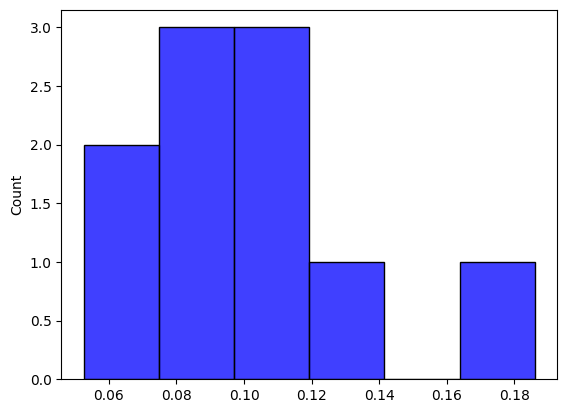

In [51]:
sns.histplot(rating_probs,color="blue")

### Density Function of Overall Rating

<Axes: ylabel='Density'>

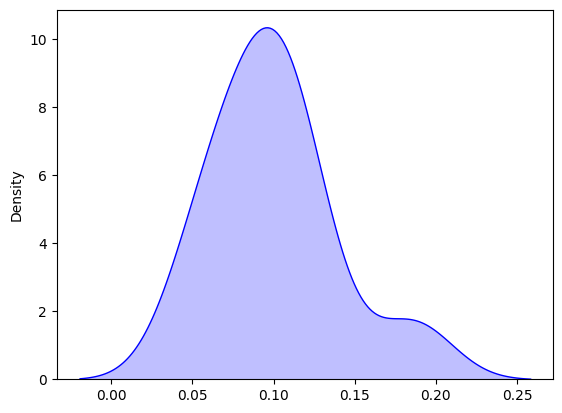

In [53]:
sns.kdeplot(rating_probs,fill=True,color="blue")

In [7]:
new_review = input("Enter your review: ")
rating_probs = compute_rating_probabilities(new_review)
print("Rating Probabilities:", rating_probs)
predicted_rating = max(rating_probs, key=rating_probs.get)
print("Predicted Rating:", predicted_rating)

Enter your review:  bad service


NameError: name 'compute_rating_probabilities' is not defined